In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:

def get_csv(root):
    
    files_list = []
    
    for path, subdirs, files in os.walk(root):

        files_list.extend(glob.glob(path+'/*.csv'))

        for fol in subdirs:
            files_list.extend(get_csv(path+fol))
    
    return files_list


files = get_csv('data')

if len(files)!=477:
    raise Exception('Some files have not been found, expected length is 477.')

In [20]:
file = files[338]
stock_data = pd.read_csv(file, index_col = 'Date', dtype = {'High':'float64','Low':'float64','Open':'float64',
                                                      'Close':'float64','Volume':'float64','Adj Close':'float64'})
stock_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-30,4.320000,4.166667,4.296667,4.170000,15701400.0,3.836231
2004-08-31,4.206666,4.023334,4.186666,4.153333,14676600.0,3.820899
2004-09-01,4.293334,4.046667,4.100000,4.233333,14793600.0,3.894496
2004-09-02,4.440000,4.213333,4.253334,4.406667,19252200.0,4.053955
2004-09-03,4.360000,4.236667,4.273334,4.273334,17876400.0,3.931294
...,...,...,...,...,...,...
2020-06-17,371.959991,362.809998,364.549988,369.440002,10188300.0,369.440002
2020-06-18,371.299988,364.579987,369.079987,368.720001,6360200.0,368.720001
2020-06-19,377.799988,369.089996,369.700012,370.450012,13104000.0,370.450012


In [3]:
global_index = set()
lengths = []
for file in files:
    
    stock_data = pd.read_csv(file, index_col = 'Date', dtype = {'High':'float64','Low':'float64','Open':'float64',
                                                      'Close':'float64','Volume':'float64','Adj Close':'float64'})
    
    if stock_data.shape[1]!=6:
        raise Exception(file + ' has ' + str(stock_data.shape[1]) + ' columns.')
    lengths.append(stock_data.shape[0])
    global_index.update(stock_data.index)
    
global_index.remove('2004-08-29')
#global_index.remove('2004-08-30')
global_index = list(global_index)
global_index.sort()

In [4]:
print(global_index)

['2004-08-30', '2004-08-31', '2004-09-01', '2004-09-02', '2004-09-03', '2004-09-05', '2004-09-06', '2004-09-07', '2004-09-08', '2004-09-09', '2004-09-10', '2004-09-12', '2004-09-13', '2004-09-14', '2004-09-15', '2004-09-16', '2004-09-17', '2004-09-19', '2004-09-20', '2004-09-21', '2004-09-22', '2004-09-23', '2004-09-24', '2004-09-26', '2004-09-27', '2004-09-28', '2004-09-29', '2004-09-30', '2004-10-01', '2004-10-03', '2004-10-04', '2004-10-05', '2004-10-06', '2004-10-07', '2004-10-08', '2004-10-10', '2004-10-11', '2004-10-12', '2004-10-13', '2004-10-14', '2004-10-15', '2004-10-17', '2004-10-18', '2004-10-19', '2004-10-20', '2004-10-21', '2004-10-22', '2004-10-24', '2004-10-25', '2004-10-26', '2004-10-27', '2004-10-28', '2004-10-29', '2004-11-01', '2004-11-02', '2004-11-03', '2004-11-04', '2004-11-05', '2004-11-08', '2004-11-09', '2004-11-10', '2004-11-11', '2004-11-12', '2004-11-15', '2004-11-16', '2004-11-17', '2004-11-18', '2004-11-19', '2004-11-22', '2004-11-23', '2004-11-24', '2004

4620
The median of the length for each stock/commodity/index/currency is 3982.0


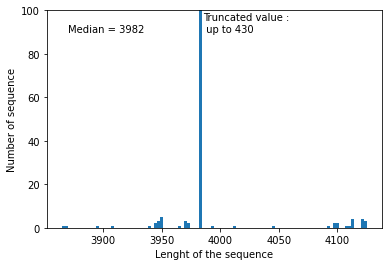

In [5]:
print(len(global_index))

print('The median of the length for each stock/commodity/index/currency is ' + str(np.median(lengths)))
plt.hist(lengths, bins = 100)
plt.ylim(top=100)
plt.text(s ='Truncated value : \n up to 430', x = 3985, y = 90)
plt.text(s = 'Median = 3982', x = 3870, y = 90)
plt.ylabel('Number of sequence')
plt.xlabel('Lenght of the sequence')
plt.show()

In [6]:
# all stocks have 6 columns but not the same length
# objective: get them all to the same length (fill up the missing values)
# how: fill missing values -> add column if stock is close for some days, and display previous value in such case

global_data = pd.DataFrame(index = global_index, dtype='object')

for file in files:
    
    stock = pd.read_csv(file, index_col = 'Date', dtype = {'High':'float64','Low':'float64','Open':'float64',
                                                      'Close':'float64','Volume':'float64','Adj Close':'float64'})
    
    if not all(stock.columns==['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']):
        raise Exception(file + ' has columns of: ' + str(stock.columns))
        
    name = file.split('\\')[-1].split('.csv')[0]
    
    serie = pd.Series(index = global_index, name = name, dtype = 'object')
    
    '''
    now we fill the serie using the stock, and we add the change info and the isRealValue, 
    then concat the serie with dataframe
    '''
    
    for i in stock.index:
        if i != '2004-08-29':
            serie[i] = stock.loc[i].tolist()
            serie[i].append(1)
        
    #now we have a np.array for all dates, must handle missing values and add the change index, then concat
    
    for i in range(len(serie.index)):
        
        
        if type(serie[i])==float and pd.isna(serie[i]) and i!=0:
            serie[i] = serie[i-1].copy()
            serie[i][6] = 0
            
        elif type(serie[i]) == list:
            date = serie.index[i].split('-')
            year_pe = (int(date[1])*33+int(date[2]))/365
            
            # change is the change ratio between previous opening and current opening 
            change = serie[i][2]/serie[max(i-1,0)][2] - 1
            serie[i].append(year_pe)
            serie[i].append(change)
            serie[i].append(-1.111) # to be used as positional encoding later
            serie[i].append(-2.222) # to be used as stock encoding later

    
    
    ''' 
    so basically, we take a stock_df and squeeze it into a serie containing np array
    we had a value to show if the data is real or inferred from the past (1 or 0)
    then we go through the serie:
        the nan are inferred using the t-1 info
        the np array are given a year positional encoding info to reflect annual trends
        the np array also get a change value which represent the evolution seen at t-1 
    '''
    
    # now we concat the serie to the global_df
    
    global_data = pd.concat([global_data, serie], axis=1)


In [7]:
print(pd.isna(global_data).sum().sum())
'''
for i in a.index:
    for j in a.columns:
        if pd.isna(a.loc[i,j]):
            print(i)
            print(j)
'''
global_data

0


,BO=F,C=F,FC=F,KW=F,LB=F,LC=F,LH=F,O=F,S=F,SB=F,...,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZBRA,ZION
2004-08-30,"[25.670000076293945, 24.649999618530273, 24.64...","[228.75, 222.0, 222.0, 224.5, 18453.0, 224.5, ...","[113.4000015258789, 111.4499969482422, 112.0, ...","[331.0, 324.0, 326.0, 324.0, 4272.0, 324.0, 1,...","[434.5, 429.1000061035156, 432.0, 432.10000610...","[84.19999694824219, 82.57499694824219, 82.9499...","[65.25, 63.5, 63.5, 65.02500152587889, 3364.0,...","[145.25, 140.0, 141.0, 142.5, 519.0, 142.5, 1,...","[631.0, 610.0, 610.0, 622.5, 5564.0, 622.5, 1,...","[7.809999942779541, 7.690000057220459, 7.69000...",...,"[30.70000076293945, 29.989999771118164, 30.420...","[17.520000457763672, 17.420000076293945, 17.44...","[28.1299991607666, 27.489999771118164, 28.0699...","[45.68999862670898, 45.09000015258789, 45.3499...","[25.479999542236328, 24.85000038146973, 25.475...","[35.52042007446289, 35.12516403198242, 35.3096...","[14.20201301574707, 14.04744815826416, 14.1445...","[71.97000122070312, 70.80000305175781, 71.6500...","[57.4900016784668, 56.1500015258789, 57.200000...","[62.61999893188477, 61.91999816894531, 62.1500..."
2004-08-31,"[26.149999618530273, 25.40999984741211, 25.450...","[228.0, 223.25, 225.75, 227.75, 32539.0, 227.7...","[112.9000015258789, 111.5250015258789, 112.650...","[330.5, 323.0, 324.5, 329.75, 6607.0, 329.75, ...","[442.1000061035156, 433.0, 433.5, 440.5, 710.0...","[84.44999694824219, 83.55000305175781, 84.0, 8...","[66.05000305175781, 64.69999694824219, 65.0, 6...","[150.0, 142.5, 150.0, 143.75, 716.0, 143.75, 1...","[628.0, 616.0, 624.0, 627.25, 6561.0, 627.25, ...","[8.0, 7.75, 7.75, 7.989999771118164, 39429.0, ...",...,"[30.35000038146973, 29.899999618530273, 30.100...","[17.649999618530273, 17.399999618530273, 17.44...","[27.5, 26.6200008392334, 27.440000534057614, 2...","[46.13000106811523, 45.2400016784668, 45.24000...","[25.479999542236328, 25.07999992370605, 25.079...","[35.54677200317383, 34.729907989501946, 35.098...","[14.273903846740724, 14.025880813598633, 14.10...","[71.47000122070312, 70.51000213623047, 71.1999...","[57.20000076293945, 55.959999084472656, 56.580...","[62.4900016784668, 61.83000183105469, 61.88999..."
2004-09-01,"[26.81999969482422, 26.10000038146973, 26.1000...","[234.0, 228.5, 230.5, 233.5, 15382.0, 233.5, 1...","[111.5999984741211, 109.8000030517578, 111.5, ...","[339.5, 328.0, 328.0, 337.0, 3121.0, 337.0, 1,...","[446.3999938964844, 438.0, 438.6000061035156, ...","[84.5, 84.5, 84.5, 84.5, 0.0, 84.5, 1, 0.81643...","[67.40000152587889, 65.44999694824219, 65.8499...","[147.5, 143.0, 143.0, 146.5, 324.0, 146.5, 1, ...","[648.5, 624.0, 634.0, 636.5, 3527.0, 636.5, 1,...","[8.199999809265138, 8.079999923706055, 8.14999...",...,"[30.95000076293945, 29.82999992370605, 29.9300...","[17.68000030517578, 17.5, 17.68000030517578, 1...","[27.979999542236328, 26.96999931335449, 27.290...","[46.54999923706055, 46.02999877929688, 46.2000...","[25.71999931335449, 25.19499969482422, 25.4850...","[35.57312393188477, 34.8089599609375, 35.25691...","[14.432063102722168, 14.191228866577148, 14.32...","[73.37999725341797, 71.25, 71.30000305175781, ...","[58.56000137329102, 56.56000137329102, 57.0, 5...","[62.43999862670898, 61.72000122070313, 62.4199..."
2004-09-02,"[26.57999992370605, 26.0, 26.45000076293945, 2...","[231.0, 226.5, 229.5, 227.75, 8988.0, 227.75, ...","[110.6999969482422, 109.25, 110.25, 109.625, 9...","[337.0, 329.0, 334.0, 329.0, 886.0, 329.0, 1, ...","[461.0, 450.0, 450.0, 455.5, 890.0, 455.5, 1, ...","[84.5, 84.5, 84.5, 84.5, 0.0, 84.5, 1, 0.81917...","[66.69999694824219, 65.19999694824219, 66.5999...","[148.0, 142.5, 146.0, 144.5, 59.0, 144.5, 1, 0...","[632.0, 623.0, 629.0, 627.75, 1966.0, 627.75, ...","[8.25, 8.130000114440918, 8.159999847412111, 8...",...,"[31.60000038146973, 30.90999984741211, 31.0499...","[17.700000762939453, 17.549999237060547, 17.54...","[27.36000061035156, 26.790000915527344, 27.020...","[46.9900016784668, 46.45000076293945, 46.70999.

In [8]:
global_data.iloc[500,277]

[34.720001220703125,
 33.970001220703125,
 34.34000015258789,
 34.450000762939446,
 1928100.0,
 31.495037078857425,
 1,
 0.5178082191780822,
 -0.018857138497488823,
 -1.111,
 -2.222]

In [15]:
saved = pd.read_pickle('final_data')
#global_data.to_pickle('final_data')

saved

,BO=F,C=F,FC=F,KW=F,LB=F,LC=F,LH=F,O=F,S=F,SB=F,...,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZBRA,ZION
2004-08-30,"[25.670000076293945, 24.649999618530273, 24.64...","[228.75, 222.0, 222.0, 224.5, 18453.0, 224.5, ...","[113.4000015258789, 111.4499969482422, 112.0, ...","[331.0, 324.0, 326.0, 324.0, 4272.0, 324.0, 1,...","[434.5, 429.1000061035156, 432.0, 432.10000610...","[84.19999694824219, 82.57499694824219, 82.9499...","[65.25, 63.5, 63.5, 65.02500152587889, 3364.0,...","[145.25, 140.0, 141.0, 142.5, 519.0, 142.5, 1,...","[631.0, 610.0, 610.0, 622.5, 5564.0, 622.5, 1,...","[7.809999942779541, 7.690000057220459, 7.69000...",...,"[30.70000076293945, 29.989999771118164, 30.420...","[17.520000457763672, 17.420000076293945, 17.44...","[28.1299991607666, 27.489999771118164, 28.0699...","[45.68999862670898, 45.09000015258789, 45.3499...","[25.479999542236328, 24.85000038146973, 25.475...","[35.52042007446289, 35.12516403198242, 35.3096...","[14.20201301574707, 14.04744815826416, 14.1445...","[71.97000122070312, 70.80000305175781, 71.6500...","[57.4900016784668, 56.1500015258789, 57.200000...","[62.61999893188477, 61.91999816894531, 62.1500..."
2004-08-31,"[26.149999618530273, 25.40999984741211, 25.450...","[228.0, 223.25, 225.75, 227.75, 32539.0, 227.7...","[112.9000015258789, 111.5250015258789, 112.650...","[330.5, 323.0, 324.5, 329.75, 6607.0, 329.75, ...","[442.1000061035156, 433.0, 433.5, 440.5, 710.0...","[84.44999694824219, 83.55000305175781, 84.0, 8...","[66.05000305175781, 64.69999694824219, 65.0, 6...","[150.0, 142.5, 150.0, 143.75, 716.0, 143.75, 1...","[628.0, 616.0, 624.0, 627.25, 6561.0, 627.25, ...","[8.0, 7.75, 7.75, 7.989999771118164, 39429.0, ...",...,"[30.35000038146973, 29.899999618530273, 30.100...","[17.649999618530273, 17.399999618530273, 17.44...","[27.5, 26.6200008392334, 27.440000534057614, 2...","[46.13000106811523, 45.2400016784668, 45.24000...","[25.479999542236328, 25.07999992370605, 25.079...","[35.54677200317383, 34.729907989501946, 35.098...","[14.273903846740724, 14.025880813598633, 14.10...","[71.47000122070312, 70.51000213623047, 71.1999...","[57.20000076293945, 55.959999084472656, 56.580...","[62.4900016784668, 61.83000183105469, 61.88999..."
2004-09-01,"[26.81999969482422, 26.10000038146973, 26.1000...","[234.0, 228.5, 230.5, 233.5, 15382.0, 233.5, 1...","[111.5999984741211, 109.8000030517578, 111.5, ...","[339.5, 328.0, 328.0, 337.0, 3121.0, 337.0, 1,...","[446.3999938964844, 438.0, 438.6000061035156, ...","[84.5, 84.5, 84.5, 84.5, 0.0, 84.5, 1, 0.81643...","[67.40000152587889, 65.44999694824219, 65.8499...","[147.5, 143.0, 143.0, 146.5, 324.0, 146.5, 1, ...","[648.5, 624.0, 634.0, 636.5, 3527.0, 636.5, 1,...","[8.199999809265138, 8.079999923706055, 8.14999...",...,"[30.95000076293945, 29.82999992370605, 29.9300...","[17.68000030517578, 17.5, 17.68000030517578, 1...","[27.979999542236328, 26.96999931335449, 27.290...","[46.54999923706055, 46.02999877929688, 46.2000...","[25.71999931335449, 25.19499969482422, 25.4850...","[35.57312393188477, 34.8089599609375, 35.25691...","[14.432063102722168, 14.191228866577148, 14.32...","[73.37999725341797, 71.25, 71.30000305175781, ...","[58.56000137329102, 56.56000137329102, 57.0, 5...","[62.43999862670898, 61.72000122070313, 62.4199..."
2004-09-02,"[26.57999992370605, 26.0, 26.45000076293945, 2...","[231.0, 226.5, 229.5, 227.75, 8988.0, 227.75, ...","[110.6999969482422, 109.25, 110.25, 109.625, 9...","[337.0, 329.0, 334.0, 329.0, 886.0, 329.0, 1, ...","[461.0, 450.0, 450.0, 455.5, 890.0, 455.5, 1, ...","[84.5, 84.5, 84.5, 84.5, 0.0, 84.5, 1, 0.81917...","[66.69999694824219, 65.19999694824219, 66.5999...","[148.0, 142.5, 146.0, 144.5, 59.0, 144.5, 1, 0...","[632.0, 623.0, 629.0, 627.75, 1966.0, 627.75, ...","[8.25, 8.130000114440918, 8.159999847412111, 8...",...,"[31.60000038146973, 30.90999984741211, 31.0499...","[17.700000762939453, 17.549999237060547, 17.54...","[27.36000061035156, 26.790000915527344, 27.020...","[46.9900016784668, 46.45000076293945, 46.70999.

In [20]:
print(all(saved.index==global_data.index))
print(all(saved.columns==global_data.columns))

print(saved.iloc[0,0]==global_data.iloc[0,0])
print(all([True,True,True,True,False,True,True]))

for i in saved.index:
    for j in saved.columns:
        if not saved.loc[i,j]==global_data.loc[i,j]:
            raise Exception("problem at " + str(i) + "  " + str(j))
        

True
True
True
False


In [19]:
saved.iloc[0,0]==global_data.iloc[0,0]

True

In [400]:
a = []
for i in global_data.columns:
    a.append(i)
    
print(a)

['BO=F', 'C=F', 'FC=F', 'KW=F', 'LB=F', 'LC=F', 'LH=F', 'O=F', 'S=F', 'SB=F', 'CL=F', 'HO=F', 'NG=F', 'GC=F', 'HG=F', 'SI=F', 'BHD=X', 'CAD=X', 'CHF=X', 'CNY=X', 'EUR=X', 'GBP=X', 'HKD=X', 'INR=X', 'JOD=X', 'JPY=X', 'KRW=X', 'KWD=X', 'MXN=X', 'NOK=X', 'NZD=X', 'RUB=X', 'SEK=X', 'SGD=X', 'ZAR=X', '^BVSP', '^DJI', '^FCHI', '^GDAXI', '^GSPC', '^HSCE', '^HSI', '^IXIC', '^N225', '^RUT', '^TNX', '^VIX', 'A', 'AAP', 'AAPL', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMT', 'AMZN', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ATO', 'ATVI', 'AVB', 'AVY', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BF-B', 'BIIB', 'BK', 'BKNG', 'BKR', 'BLK', 'BLL', 'BMY', 'BRK-B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBRE', 'CCI', 'CCL', 'CDNS', 'CERN', 'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX